# Kollokasjoner for nøkkelord

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [2]:
css()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [9]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [10]:
reference = pd.read_json('avis_agg_sample_20.json')

In [11]:
keyword = 'demokrati'

In [12]:
filename = 'collocation_' + keyword + ".csv"

## Grafstruktur topos

In [13]:
keyword_graph = nb.make_graph(keyword, cutoff=16)

In [14]:
comm = gnl.community_dict(keyword_graph)

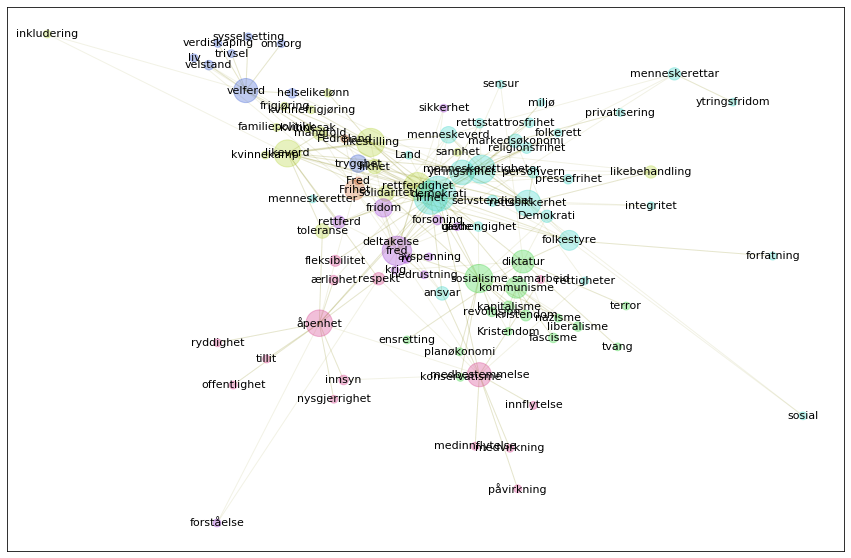

In [15]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [16]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [17]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ' ,'.join(i)))

<span style='font-size:1.1em'>åpenhet ,Demokrati ,mangfold ,innsyn ,rettssikkerhet ,solidaritet ,sikkerhet ,likhet ,velferd ,personvern ,uavhengighet ,kristendom ,rettsstat ,rettferdighet ,kommunisme ,menneskeverd ,revolusjon ,Kristendom ,likeverd ,liberalisme ,likebehandling ,Frihet ,religionsfrihet ,sosialisme ,folkestyre ,sosial ,respekt ,fridom ,demokrati ,fascisme ,ytringsfrihet ,toleranse ,menneskerettigheter ,markedsøkonomi ,fred ,glede ,trygghet ,diktatur ,pressefrihet ,trosfrihet ,medbestemmelse ,rettferd ,likestilling ,frihet ,menneskerettar ,selvstendighet ,integritet ,forsoning ,fleksibilitet ,kapitalisme</span>

<span style='font-size:1.1em'>diktatur ,demokrati ,sosialisme ,kommunisme</span>

<span style='font-size:1.1em'>folkestyre ,demokrati ,ytringsfrihet ,rettssikkerhet ,menneskerettigheter ,fred ,likhet ,trygghet ,rettferdighet ,menneskeverd ,likestilling ,frihet ,likeverd ,Frihet ,sosialisme</span>

<span style='font-size:1.1em'>demokrati ,rettferdighet ,menneskeverd ,menneskerettigheter ,likestilling ,fred ,frihet ,likeverd</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [18]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### demokrati-likestilling
<span style='font-size:1.1em'>demokrati, likestilling, likeverd, folkestyre, solidaritet, mangfold, markedsøkonomi, menneskerettar, rettsstat, privatisering, ytringsfridom, kvinnesak, deltakelse, kvinnefrigjøring, forfatning, frigjøring, menneskeretter, familiepolitikk, likelønn, kvinnekamp, inkludering</span>
### sosialisme-diktatur
<span style='font-size:1.1em'>sosialisme, diktatur, kommunisme, Demokrati, kristendom, kapitalisme, fascisme, revolusjon, liberalisme, ensretting, konservatisme, nazisme, terror, Kristendom, tvang, planøkonomi</span>
### rettferdighet-åpenhet
<span style='font-size:1.1em'>rettferdighet, åpenhet, toleranse, likhet, likebehandling, innsyn, ærlighet, nysgjerrighet, ryddighet, offentlighet, sannhet, tillit</span>
### velferd-trygghet
<span style='font-size:1.1em'>velferd, trygghet, velstand, helse, trivsel, sysselsetting, verdiskaping, liv, omsorg</span>
### fred-fridom
<span style='font-size:1.1em'>fred, fridom, rettferd, forsoning, avspenning, forståelse, sikkerhet, ro, nedrustning, glede, krig</span>
### medbestemmelse-respekt
<span style='font-size:1.1em'>medbestemmelse, respekt, medvirkning, påvirkning, medinnflytelse, innflytelse, samarbeid</span>
### menneskerettigheter-rettssikkerhet
<span style='font-size:1.1em'>menneskerettigheter, rettssikkerhet, ytringsfrihet, menneskeverd, personvern, religionsfrihet, pressefrihet, trosfrihet, sosial, folkerett, sensur, rettigheter, miljø</span>
### frihet-Frihet
<span style='font-size:1.1em'>frihet, Frihet, ansvar, selvstendighet, fleksibilitet, uavhengighet, Land, Fred, integritet, Fedreland</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [19]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

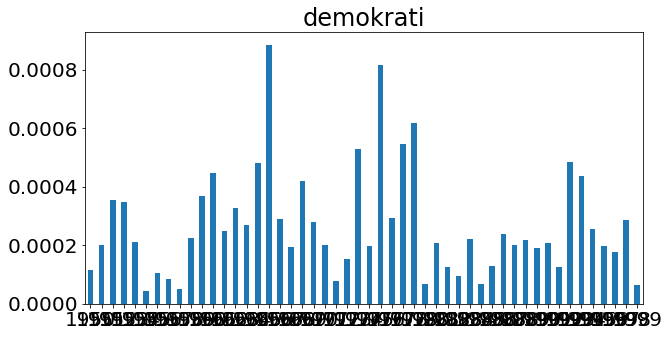

In [20]:
barchart(keyword, reference);

In [21]:
from time import time

collocations = dict()
step = 1

for i in range(1950, 2000):
    print(i)
    t0 = time()
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)
    print((time() - t0)/60, "minutter")

1950
0.6975778500239055 minutter
1951
0.377026375134786 minutter
1952
0.3857176065444946 minutter
1953
0.35296013752619426 minutter
1954
0.36576072374979657 minutter
1955
0.39105198383331297 minutter
1956
0.38741745948791506 minutter
1957
0.3880245010058085 minutter
1958
0.43102351427078245 minutter
1959
0.4586432456970215 minutter
1960
0.5668063600858052 minutter
1961
0.8063213944435119 minutter
1962
0.8574135104815165 minutter
1963
0.8310083587964375 minutter
1964
0.7056403279304504 minutter
1965
0.5863222400347392 minutter
1966
0.6262665788332621 minutter
1967
0.6693261742591858 minutter
1968
0.6207208633422852 minutter
1969
0.7539586623509725 minutter
1970
0.7344219207763671 minutter
1971
0.5392682631810506 minutter
1972
0.5410645882288615 minutter
1973
0.5500305652618408 minutter
1974
0.6924803058306376 minutter
1975
0.5904714941978455 minutter
1976
0.7809539755185445 minutter
1977
0.43097123702367146 minutter
1978
0.6232413172721862 minutter
1979
0.5003764351209005 minutter
1980


In [22]:
colls = nb.frame(collocations)

In [23]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [24]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [25]:
agg = group_frames(colls)

In [26]:
nb.normalize_corpus_dataframe(agg)

True


# Opptelling

# Sammenligner med en referanse


In [27]:
reference.sort_values(by=reference.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
.,1.39098,1.39011,1.32974,1.31876,1.31522,1.33115,1.32032,1.28226,1.31114,1.27826,1.22015,1.17079,1.23745,1.29461,1.28554,1.25099,1.2219,1.38504,1.24515,1.33251,1.29176,1.31627,1.22451,1.27574,1.24207,1.25917,1.21733,1.1969,1.21583,1.18739,1.29005,1.22005,1.24174,1.25352,1.30283,1.23567,1.3153,1.36488,1.40242,1.3226,1.35333,1.39079,1.41228,1.39136,1.29477,1.33864,1.28848,1.37039,1.23171,1.41384
",",0.76954,0.856414,0.795358,0.881156,0.806442,0.743545,0.837655,0.742889,0.754299,0.87736,0.786793,0.820144,0.748338,0.786501,0.871437,0.87292,0.836479,1.0084,0.7684,0.839177,0.735266,0.729174,0.686146,0.724146,0.737229,0.71974,0.718431,0.71361,0.667856,0.701938,0.769266,0.702013,0.738465,0.742419,0.720979,0.725155,0.80166,0.77114,0.787629,0.672002,0.640604,0.717421,0.785378,0.77462,0.758297,0.747596,0.740608,0.754163,0.731341,0.706799
i,0.448572,0.490718,0.494876,0.505146,0.495696,0.493653,0.501771,0.561204,0.493934,0.468949,0.520136,0.499579,0.500054,0.493851,0.517313,0.497924,0.500399,0.485552,0.496983,0.497255,0.494801,0.503126,0.50562,0.477942,0.492472,0.470903,0.490651,0.453728,0.479439,0.459831,0.461423,0.477404,0.446913,0.464701,0.445798,0.449428,0.410621,0.437679,0.411688,0.438477,0.440603,0.437625,0.396097,0.399638,0.407435,0.409982,0.426179,0.419586,0.406545,0.39061
og,0.383426,0.464821,0.411131,0.463728,0.430163,0.479666,0.392801,0.386091,0.413687,0.394402,0.425193,0.435716,0.444428,0.438936,0.442386,0.418031,0.439723,0.395065,0.414101,0.424339,0.344844,0.364508,0.398127,0.367014,0.37332,0.356991,0.412768,0.355218,0.400409,0.374849,0.3646,0.365743,0.36416,0.405785,0.403822,0.385317,0.373198,0.377977,0.33959,0.348051,0.322756,0.288004,0.348158,0.348168,0.298878,0.303044,0.343276,0.342268,0.354872,0.32353
er,0.218263,0.244129,0.227565,0.237595,0.235194,0.25221,0.22493,0.22228,0.234139,0.211662,0.23289,0.224294,0.225517,0.224779,0.216897,0.217586,0.217856,0.209655,0.213175,0.206154,0.19566,0.198908,0.221664,0.212436,0.228091,0.211505,0.222451,0.220346,0.226186,0.210243,0.219563,0.223764,0.211004,0.229611,0.217844,0.210852,0.206027,0.228521,0.193161,0.20312,0.20104,0.21487,0.190787,0.203987,0.202966,0.201665,0.191281,0.20129,0.206863,0.188951
det,0.211415,0.241213,0.227533,0.229656,0.23466,0.255584,0.217595,0.209046,0.230751,0.205705,0.234179,0.222644,0.232854,0.21727,0.206074,0.210301,0.225333,0.179355,0.202696,0.181327,0.175721,0.176576,0.195948,0.195361,0.202018,0.188615,0.208865,0.191718,0.194573,0.184479,0.194055,0.18228,0.176611,0.193236,0.172973,0.162115,0.166243,0.171335,0.147281,0.153739,0.153724,0.159661,0.134479,0.146996,0.13992,0.1407,0.126959,0.134905,0.145275,0.132223
til,0.211294,0.246022,0.225881,0.250039,0.228036,0.246956,0.230689,0.230958,0.23702,0.215457,0.243444,0.230365,0.251778,0.230768,0.230874,0.214544,0.228794,0.204417,0.224576,0.208807,0.221851,0.204496,0.217234,0.22028,0.226254,0.221014,0.222756,0.212368,0.21053,0.212503,0.225126,0.221852,0.21734,0.225401,0.21404,0.200512,0.19886,0.198167,0.177525,0.19539,0.187288,0.193843,0.180282,0.173306,0.176025,0.175332,0.181045,0.175954,0.177338,0.171895
av,0.185768,0.210382,0.19872,0.210461,0.197723,0.199487,0.200058,0.182342,0.192366,0.189662,0.200122,0.186039,0.190749,0.198935,0.20195,0.197942,0.201319,0.186709,0.197593,0.181895,0.18721,0.183224,0.190604,0.181473,0.183229,0.183522,0.177917,0.185628,0.180499,0.171443,0.172337,0.1697,0.165983,0.171711,0.168311,0.161372,0.158221,0.166031,0.144714,0.149101,0.14809,0.150793,0.142778,0.141303,0.13673,0.137954,0.128789,0.131942,0.142408,0.132305
som,0.184538,0.216867,0.196289,0.218786,0.204427,0.217225,0.205257,0.193064,0.207225,0.193287,0.221764,0.2004,0.212438,0.206862,0.203928,0.215046,0.209196,0.18701,0.198748,0.181824,0.187924,0.18537,0.194704,0.188052,0.197147,0.

In [28]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0507393,0.0516302,0.0501388,0.0522712,0.0534833
",",0.033624,0.0332161,0.0321793,0.0331582,0.0348963
i,0.0270873,0.0304955,0.0305158,0.0290154,0.0294905
og,0.0291352,0.0291361,0.0290101,0.0317559,0.0313881
det,0.025691,0.0220286,0.0216963,0.0185494,0.0160011
er,0.0213851,0.0187784,0.0210234,0.0217114,0.0218845
for,0.0169543,0.0166078,0.0167066,0.0181199,0.0174263
som,0.0167032,0.015597,0.0162146,0.0154906,0.0147779
et,0.0166323,0.0149248,0.0152801,0.0162872,0.0154279
at,0.0120482,0.0119801,0.0126566,0.0117862,0.0111195


In [29]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]**1.02/(pd.concat([agg[i], reference[i]],axis=1).sum(axis=1))

In [30]:
nb.normalize_corpus_dataframe(pmi)

True

<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [31]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
kommunisme,4.10677e-05,2.50562e-05,2.61266e-05,3.20643e-05,2.03325e-05
diktatur,4.07998e-05,2.45006e-05,2.93019e-05,3.063e-05,2.11843e-05
eiendomsbesittende,4.07277e-05,2.45498e-05,2.75164e-05,3.06973e-05,1.8694e-05
menneskerettigheter,4.0346e-05,1.4092e-05,2.62974e-05,3.18922e-05,2.09874e-05
parlamentarisme,4.03114e-05,2.50655e-05,2.50334e-05,3.2092e-05,1.51169e-05
demokrati,4.01379e-05,2.25834e-05,2.82639e-05,3.24351e-05,1.8953e-05
diktaturet,4.01275e-05,7.53035e-06,2.03759e-05,3.19256e-05,1.55204e-05
Demokrati,3.99917e-05,2.49809e-05,2.76958e-05,3.22584e-05,1.93601e-05
rettssikkerhet,3.99561e-05,2.47204e-05,3.04966e-05,2.96783e-05,1.75715e-05
styreform,3.98997e-05,1.94117e-05,3.01496e-05,3.20881e-05,2.01377e-05


In [32]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
kommunisme,4.10677e-05,2.50562e-05,2.61266e-05,3.20643e-05,2.03325e-05
diktatur,4.07998e-05,2.45006e-05,2.93019e-05,3.063e-05,2.11843e-05
eiendomsbesittende,4.07277e-05,2.45498e-05,2.75164e-05,3.06973e-05,1.8694e-05
menneskerettigheter,4.0346e-05,1.4092e-05,2.62974e-05,3.18922e-05,2.09874e-05
parlamentarisme,4.03114e-05,2.50655e-05,2.50334e-05,3.2092e-05,1.51169e-05
demokrati,4.01379e-05,2.25834e-05,2.82639e-05,3.24351e-05,1.8953e-05
diktaturet,4.01275e-05,7.53035e-06,2.03759e-05,3.19256e-05,1.55204e-05
Demokrati,3.99917e-05,2.49809e-05,2.76958e-05,3.22584e-05,1.93601e-05
rettssikkerhet,3.99561e-05,2.47204e-05,3.04966e-05,2.96783e-05,1.75715e-05
styreform,3.98997e-05,1.94117e-05,3.01496e-05,3.20881e-05,2.01377e-05


In [33]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
industrielt,3.77842e-05,2.64791e-05,3.06937e-05,1.67998e-05,6.03185e-06
Industrielt,3.97148e-05,2.59887e-05,2.67123e-05,2.93775e-05,0
arbeidsplassen,8.79398e-06,2.52499e-05,2.87708e-05,1.69855e-05,6.48348e-06
parlamentarisme,4.03114e-05,2.50655e-05,2.50334e-05,3.2092e-05,1.51169e-05
kommunisme,4.10677e-05,2.50562e-05,2.61266e-05,3.20643e-05,2.03325e-05
Demokrati,3.99917e-05,2.49809e-05,2.76958e-05,3.22584e-05,1.93601e-05
Aspengren,3.65337e-05,2.49052e-05,5.61622e-06,5.14888e-06,7.69382e-07
bedriftslivet,2.67809e-05,2.49031e-05,2.78617e-05,6.52841e-06,1.84366e-05
demokratiets,3.825e-05,2.4857e-05,2.67748e-05,2.87429e-05,1.78175e-05
Vietnam,1.23867e-05,2.48187e-05,2.79911e-06,7.04344e-06,3.09661e-06


In [34]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
folkestyre,3.7794e-05,2.34845e-05,3.07291e-05,2.42837e-05,2.10852e-05
industrielt,3.77842e-05,2.64791e-05,3.06937e-05,1.67998e-05,6.03185e-06
rettssikkerhet,3.99561e-05,2.47204e-05,3.04966e-05,2.96783e-05,1.75715e-05
medbestemmelse,3.83285e-05,2.45237e-05,3.01558e-05,2.8907e-05,1.83243e-05
styreform,3.98997e-05,1.94117e-05,3.01496e-05,3.20881e-05,2.01377e-05
bedriftsdemokrati,0,2.4673e-05,2.99566e-05,2.2131e-05,1.91947e-05
Diktatur,3.86168e-05,2.4801e-05,2.98644e-05,3.10526e-05,1.96465e-05
Karamanlis,0,2.35332e-05,2.98544e-05,2.96167e-05,1.92857e-05
respekten,3.93111e-05,1.45222e-05,2.98442e-05,2.34608e-05,1.37955e-05
Demokratiet,3.96643e-05,2.17069e-05,2.98338e-05,3.19104e-05,2.02427e-05


In [35]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
Gorbatsjov,0,0,0,3.24543e-05,1.45637e-06
demokrati,4.01379e-05,2.25834e-05,2.82639e-05,3.24351e-05,1.8953e-05
Demokrati,3.99917e-05,2.49809e-05,2.76958e-05,3.22584e-05,1.93601e-05
markedsøkonomi,0,2.29509e-05,2.77404e-05,3.21922e-05,1.56786e-05
pluralisme,0,2.28192e-05,2.93221e-05,3.21685e-05,2.01591e-05
Pinochet,0,0,2.87197e-05,3.21651e-05,1.71257e-05
rettsstat,3.94909e-05,8.39707e-06,2.97848e-05,3.20958e-05,1.83775e-05
parlamentarisme,4.03114e-05,2.50655e-05,2.50334e-05,3.2092e-05,1.51169e-05
pressefrihet,3.90788e-05,2.41401e-05,2.97497e-05,3.20881e-05,2.00994e-05
styreform,3.98997e-05,1.94117e-05,3.01496e-05,3.20881e-05,2.01377e-05


In [36]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
diktatur,4.07998e-05,2.45006e-05,2.93019e-05,3.063e-05,2.11843e-05
folkestyre,3.7794e-05,2.34845e-05,3.07291e-05,2.42837e-05,2.10852e-05
menneskerettigheter,4.0346e-05,1.4092e-05,2.62974e-05,3.18922e-05,2.09874e-05
EU,0,0,1.85414e-06,0,2.09712e-05
Demo,0,0,0,0,2.09632e-05
representativt,1.62914e-05,1.76968e-05,1.83871e-05,2.78101e-05,2.06006e-05
Albania,0,2.26349e-05,1.79384e-06,9.16131e-06,2.05413e-05
ytringsfrihet,3.92697e-05,1.23641e-05,2.81441e-05,3.07863e-05,2.04188e-05
Clinton,0,0,0,0,2.03758e-05
EUs,0,0,0,0,2.03758e-05


<br>
<br>

In [37]:
pmi.to_csv(filename)

# Assosiasjoner og variasjon over år.

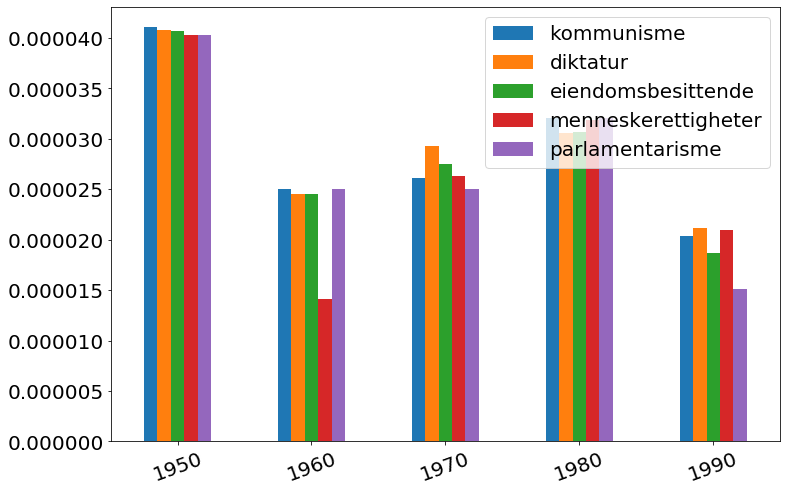

In [38]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [39]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

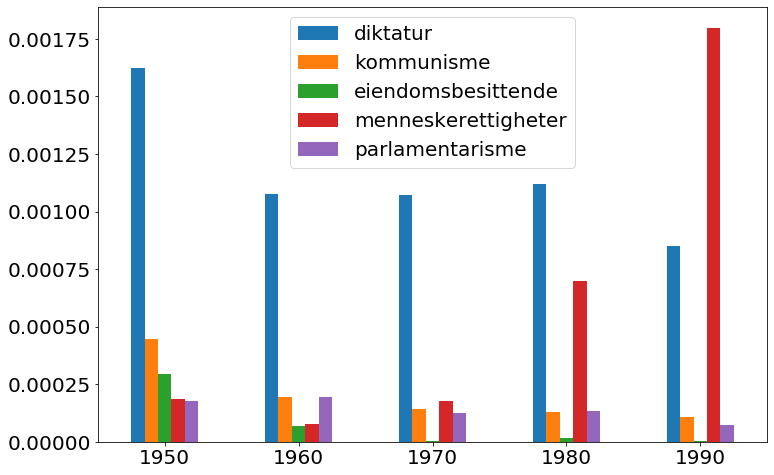

In [40]:
freq_assoc_val(agg, pmi, 0)

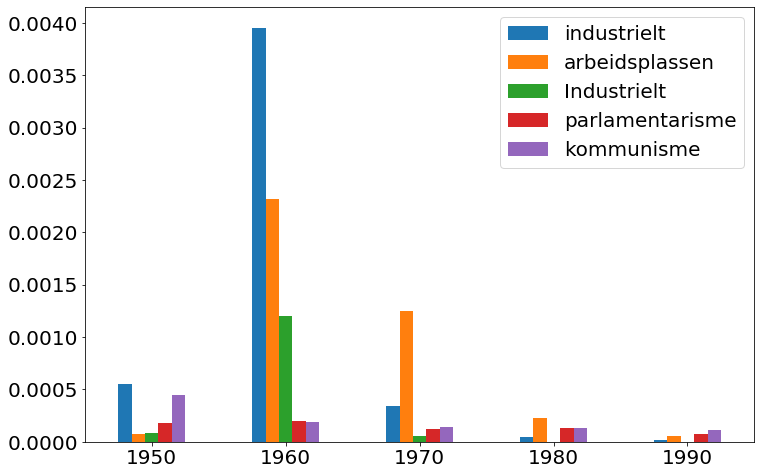

In [41]:
freq_assoc_val(agg, pmi, 1)

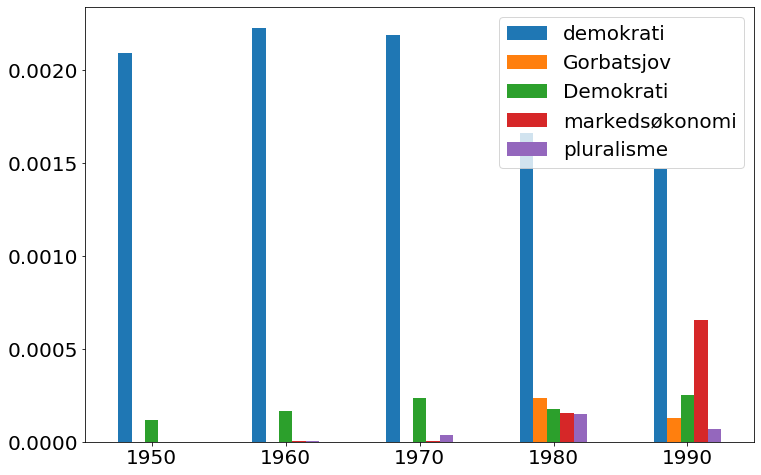

In [42]:
freq_assoc_val(agg, pmi, 3)

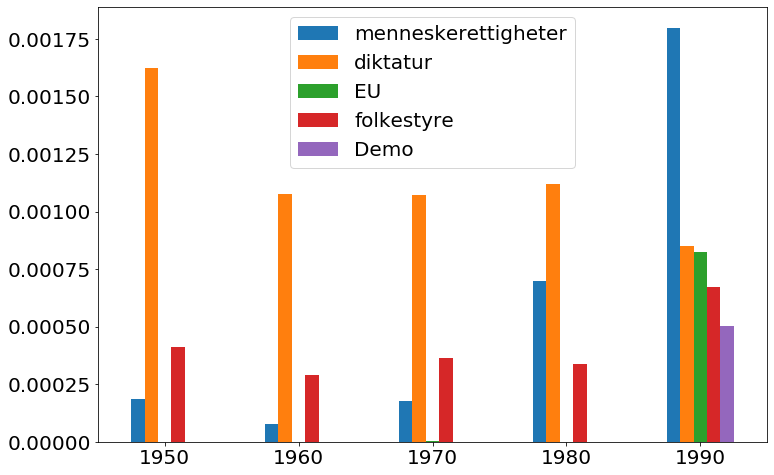

In [43]:
freq_assoc_val(agg, pmi, 4)

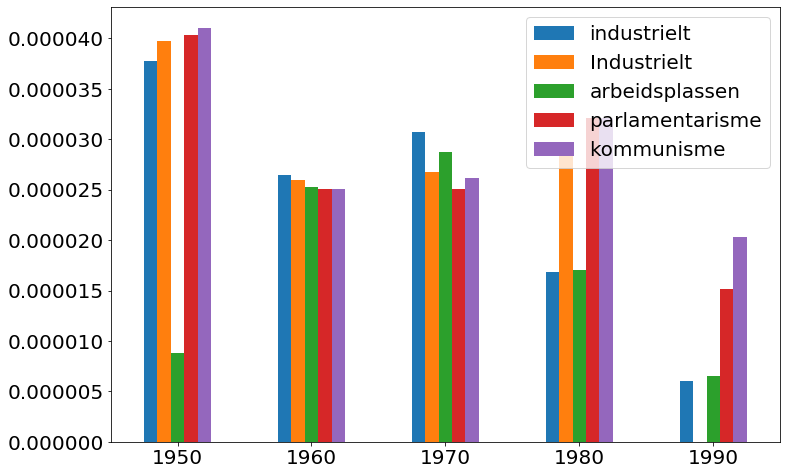

In [44]:
freq_assoc_val(pmi, pmi, 1)

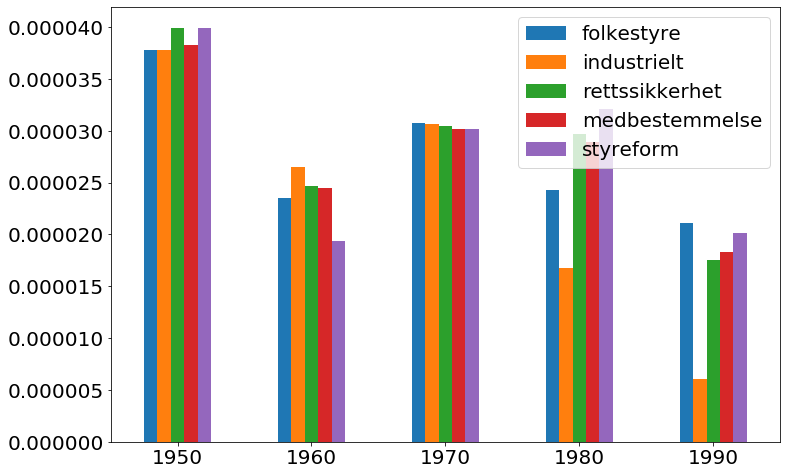

In [45]:
freq_assoc_val(pmi, pmi, 2)

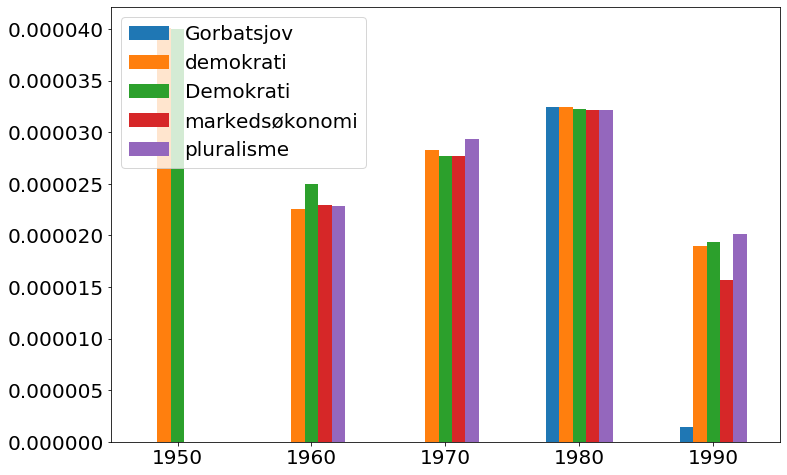

In [46]:
freq_assoc_val(pmi, pmi, 3)

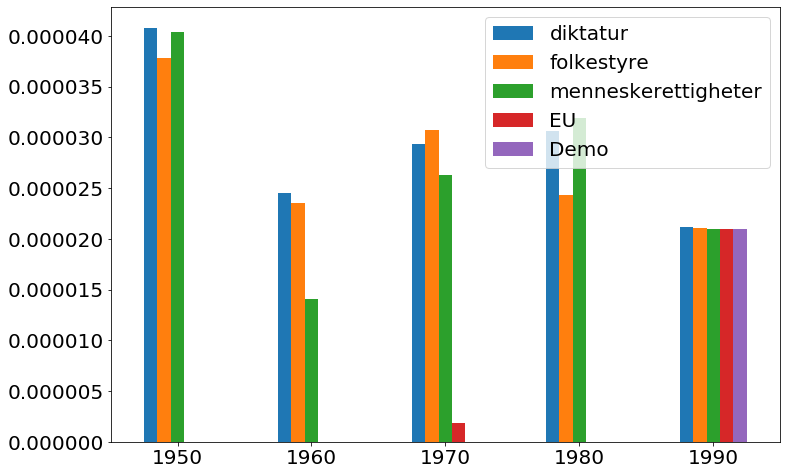

In [47]:
freq_assoc_val(pmi, pmi, 4)

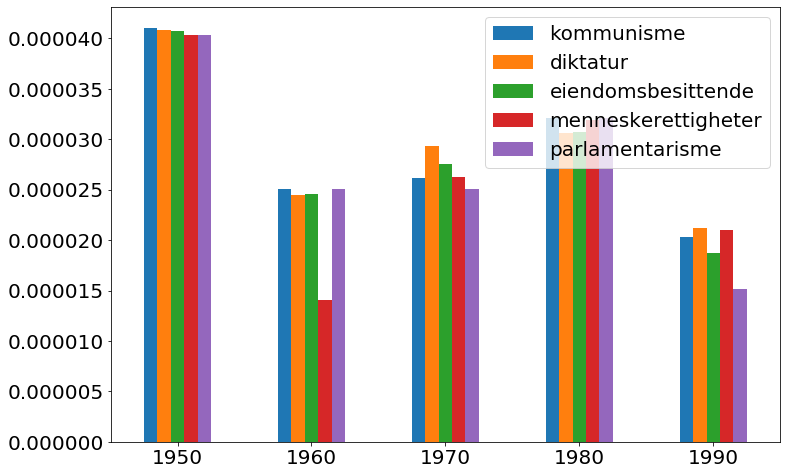

In [48]:
freq_assoc_val(pmi, pmi, 0)

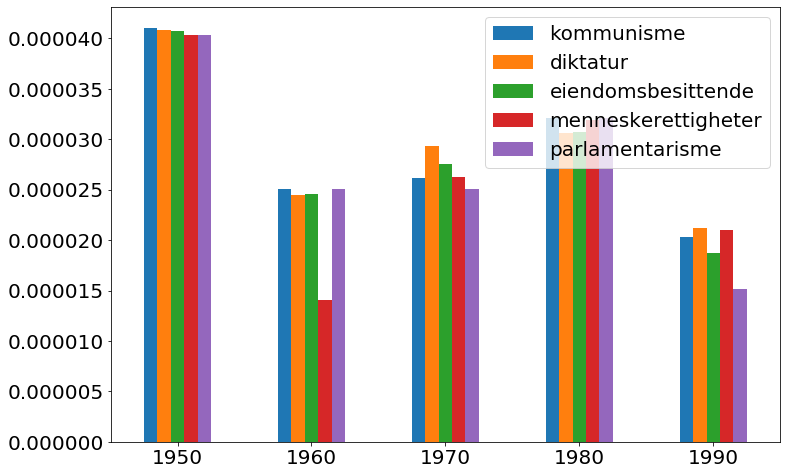

In [49]:
freq_assoc_val(pmi, pmi, 0)

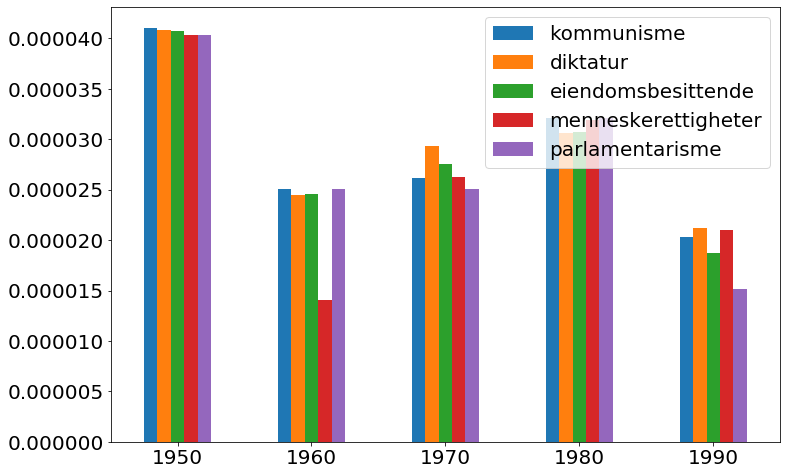

In [50]:
freq_assoc_val(pmi, pmi, 0)

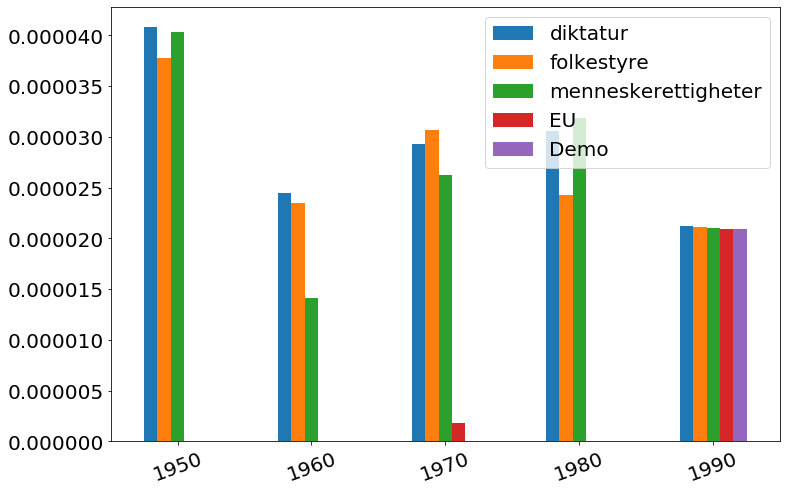

In [51]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

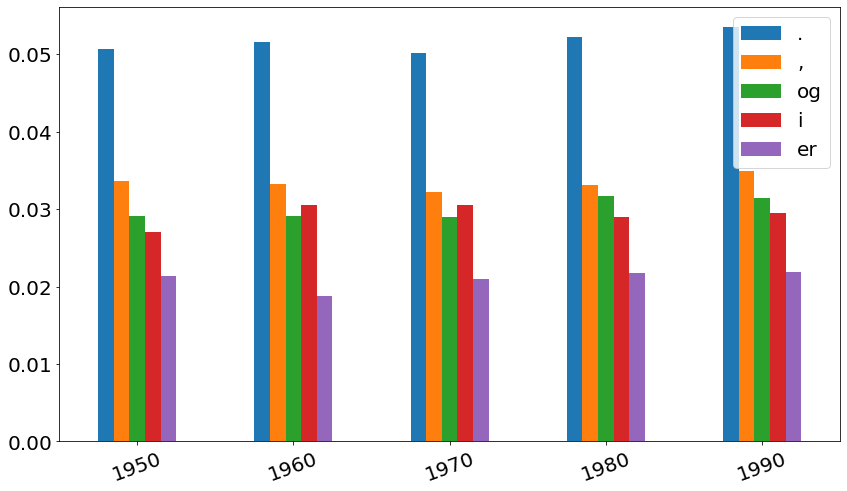

In [52]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [53]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Diktatur, Karamanlis, Demokratiet, AKP, Soares, Colombia, Sletbak, Weber, Vestens, Kongress, Kommunisme, ØD, Rhodesia, Presserunden, Begrepet, SVs, Francos, Suarez, Notaker, Libertas, Romatraktaten, Dahl-Hansen, Janata</span>

## subst
<span style='font-size:1.1em'>folkestyre, rettssikkerhet, styreform, bedriftsdemokrati, respekten, bedriftsdemokratiet, rettsstat, medinnflytelse, pressefrihet, ulydighet, styresett, politistat, sentralisme, hverdagen, anarki, humanisme, menneskerett, menneskerettighetene, ytringsfriheten, sosialisering, organisasjonsfrihet, folkeviljen, råderett, ideal, grasrota, pluralisme, sunnhetstegn, selvråderett, diktatur, folkedemokrati, demokratier, forsoning, likhetstegn, rettsstaten, monarki, folkeavstemninger, pamper, flerpartisystem, styreformer, spillfekteri, makthavere</span>
## adj
<span style='font-size:1.1em'>industrielt, uforenlig, funksjonsdyktig, livskraftig, konstitusjonelle, autoritært, fullkomment, konstitusjonelt, proletarisk, fascistisk, totalitært, sunne, ufullkomment</span>
## unknown
<span style='font-size:1.1em'>medbestemmelse, kvardagen, folkenes, samfunnsform, kriseløsning, flertallets, øst-europeiske, borgarleg, vest-europeisk, lønnstakerfond, maktkonsentrasjon, kyrkjelege, gjeninnføring, språkleg, enkeltmennesket, flertallsdiktatur, meningsfrihet, vestlege, flertallsstyre</span>
## verb
<span style='font-size:1.1em'>gjeninnføre, misbrukes, avskaffe</span>
## fork
<span style='font-size:1.1em'>m-l</span>


# Hvordan utvikler ordene seg?

In [54]:
barchart = lambda w, title='', df=pmi: df.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

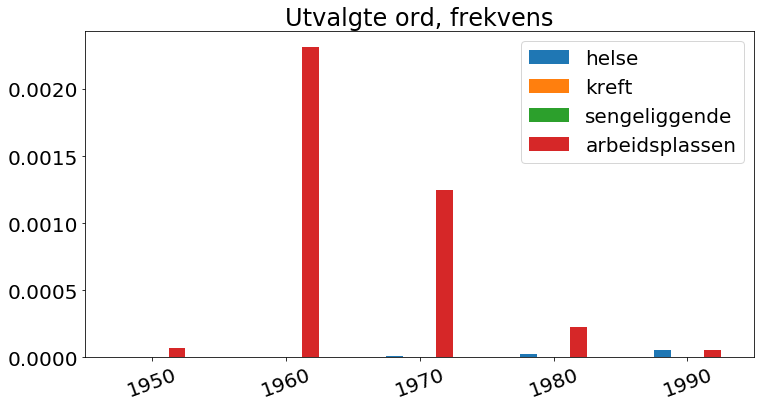

In [55]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, frekvens', df=agg);

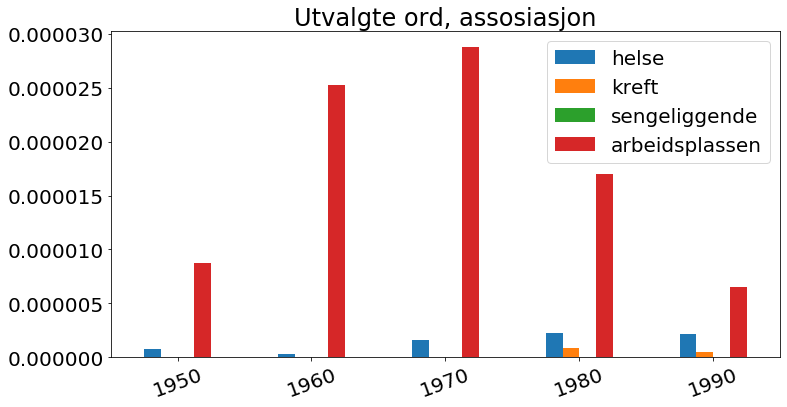

In [56]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

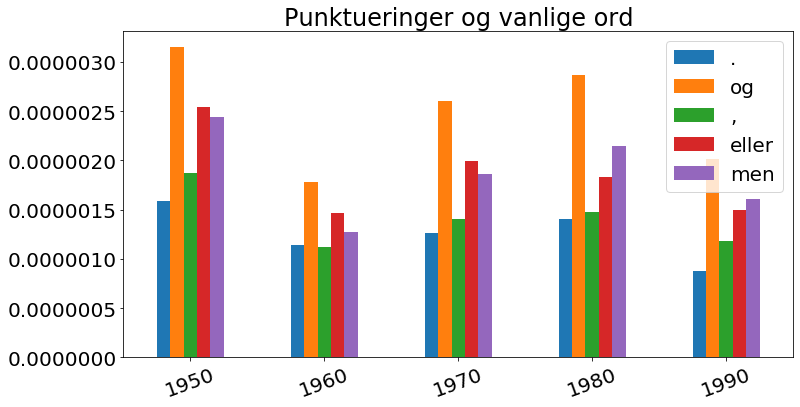

In [57]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

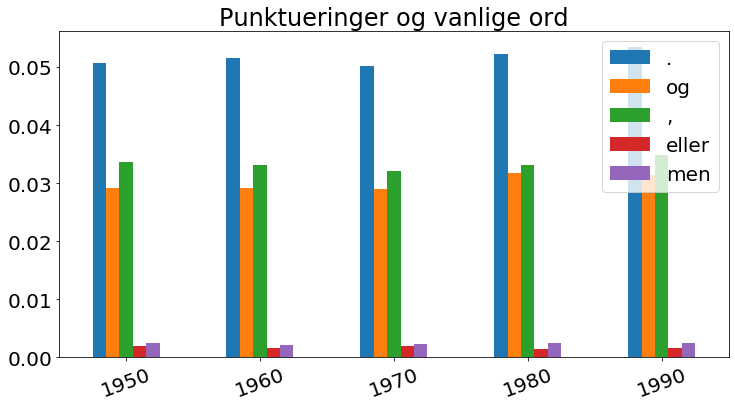

In [58]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [59]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

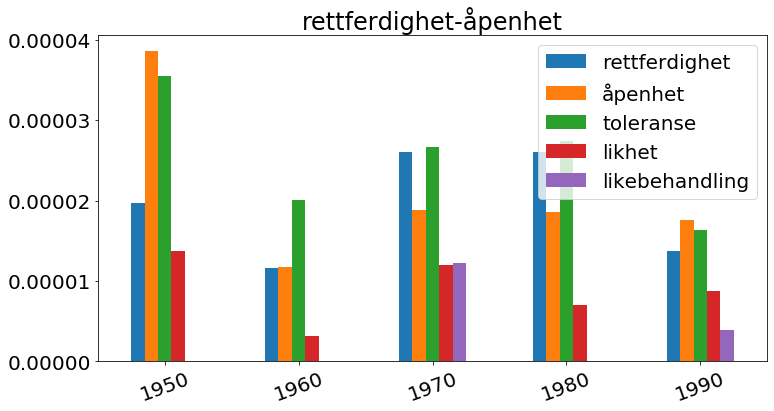

In [60]:
commchart(2, (0,5));

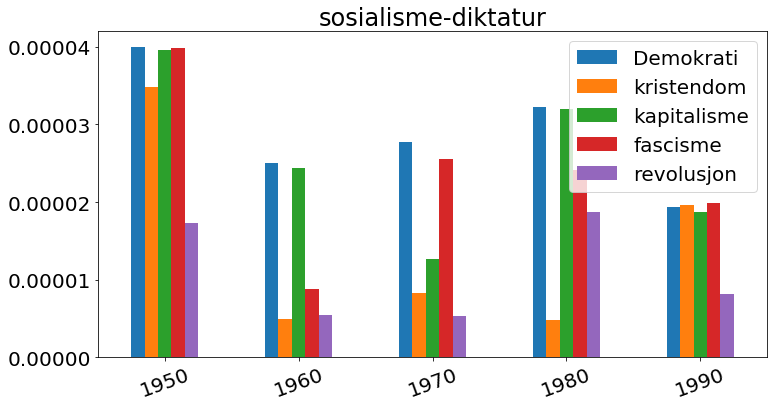

In [61]:
commchart(1, (3, 8))

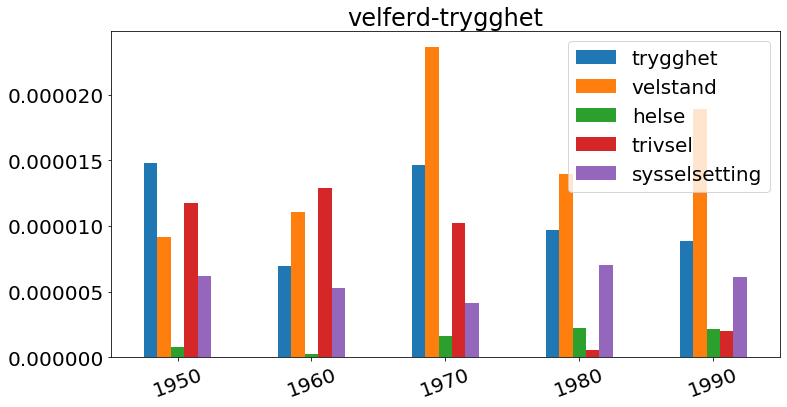

In [62]:
commchart(3)